
# Regression Lab Sheet — *mtcars* Dataset

**Goal:** Practice the full regression workflow you will use in the quiz:  
*data exploration → simple regression → multiple regression → transformation → diagnostics → reflection.*

This lab uses a **different dataset** from the teaching notebook: the classic **`mtcars`** dataset.



## Learning Outcomes
By the end of this lab you should be able to:
1. Load and explore a dataset and identify candidate predictors.
2. Fit and interpret a **simple linear regression**.
3. Fit and interpret a **multiple linear regression**.
4. Apply a **log transformation** and explain why/when it helps.
5. Read key diagnostics: **R² / Adj. R², AIC/BIC, Durbin–Watson, normality tests, Condition Number**.
6. Answer short quiz-style questions about your results.



---
## 1) Setup & Load the Data

**Instruction:** Import the required libraries. Load the `mtcars` dataset via `statsmodels`. Explore the data.

> *What to think about*: Which variables might predict **miles per gallon (`mpg`)**?


In [1]:

# --- Code: import libraries and load the dataset ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the mtcars dataset from statsmodels
mtcars = sm.datasets.get_rdataset("mtcars").data

# Preview the first rows
mtcars.head()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2



**Task A:** Use `.describe()` and `.info()` to explore the dataset.  
- Identify numeric predictors that might be relevant for `mpg` (e.g., `wt`, `hp`, `disp`, `cyl`).  
- Jot down a short hypothesis: *"I expect mpg to decrease as wt increases,"* etc.


In [2]:

# --- Code: quick data summary ---
mtcars.describe()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [3]:

# --- Code: structure / types ---
mtcars.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB



---
## 2) Visual Exploration: Scatterplots (mpg vs each variable)

**Instruction:** Before fitting models, create **scatterplots** of `mpg` against **each numeric predictor** to see which variables look suitable for a **linear** relationship with `mpg`.

> *What to think about*: Look for approximately straight-line patterns (linear trend), obvious outliers, or curvature. Make notes on which variables you would include first.


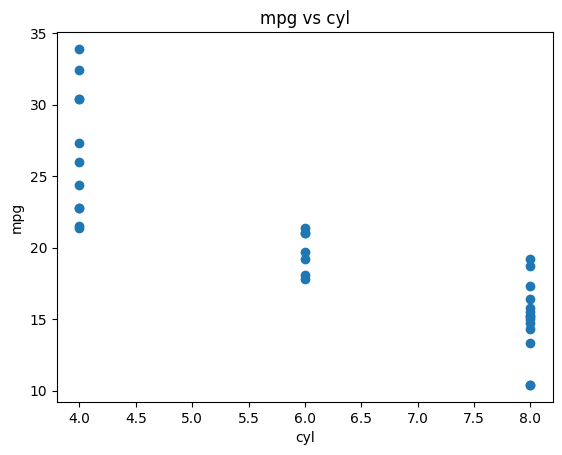

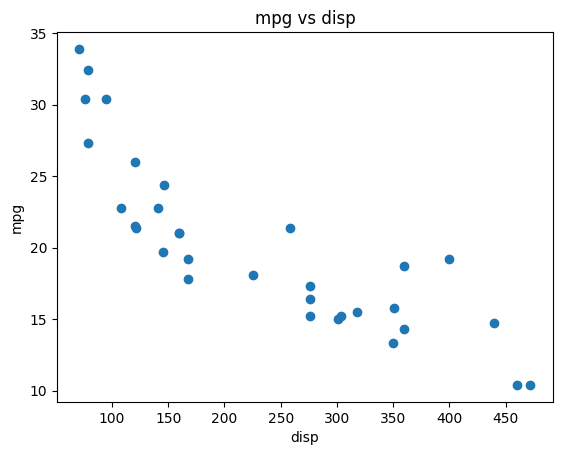

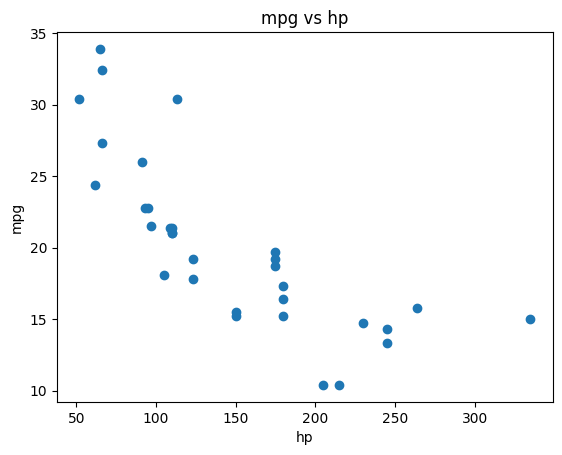

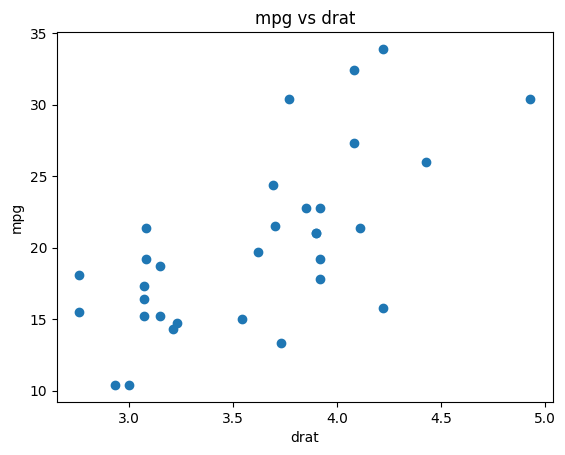

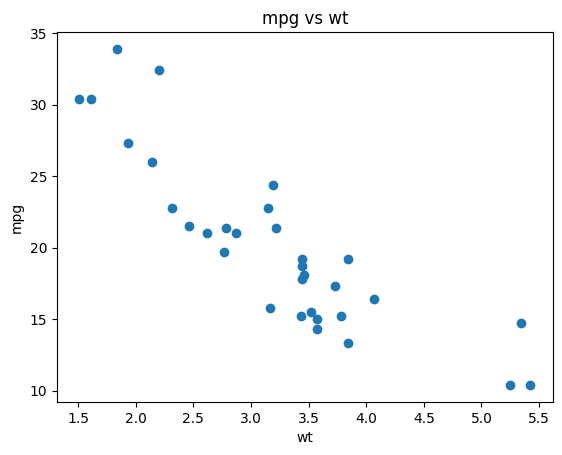

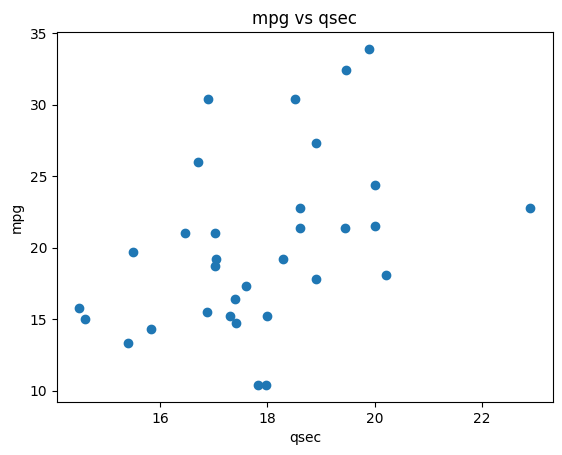

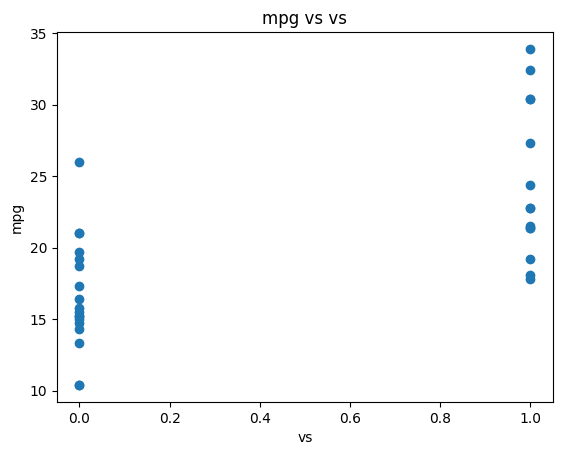

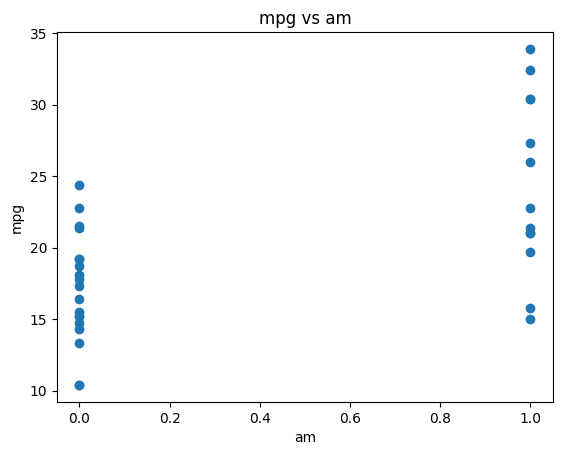

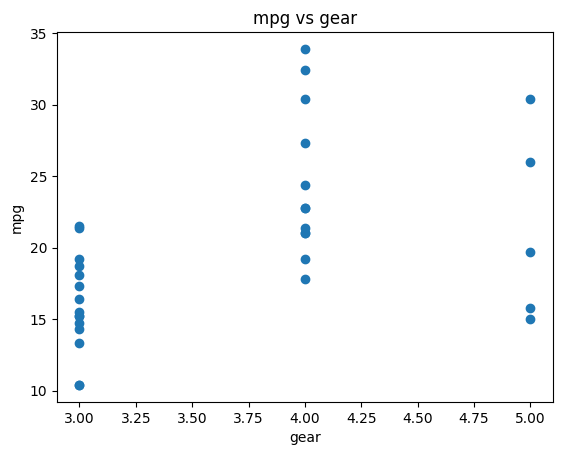

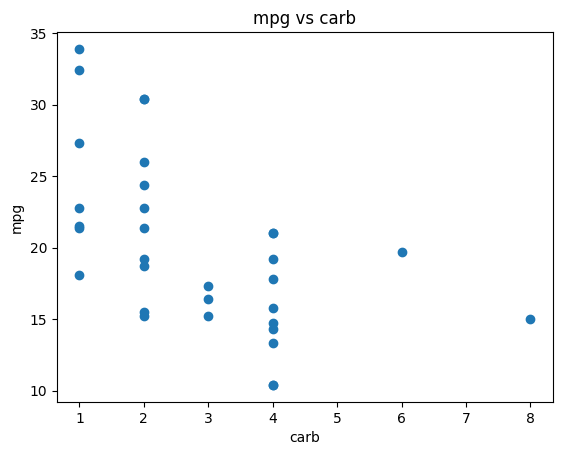

In [4]:

# --- Code: scatterplots mpg vs each numeric variable (separate figures) ---
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ensure mtcars is loaded (from earlier cell). If not, uncomment the next two lines:
# import statsmodels.api as sm
# mtcars = sm.datasets.get_rdataset("mtcars").data

numeric_cols = mtcars.select_dtypes(include=np.number).columns.tolist()

# Remove the response variable from the list
if "mpg" in numeric_cols:
    numeric_cols.remove("mpg")

for col in numeric_cols:
    plt.figure()
    plt.scatter(mtcars[col], mtcars["mpg"])
    plt.xlabel(col)
    plt.ylabel("mpg")
    plt.title(f"mpg vs {col}")
    plt.show()



**Task (Visual assessment):**
1. List 2–3 variables that show a **clear negative** relationship with `mpg`.
2. List any variables that appear to have a **nonlinear** pattern or notable **outliers**.
3. Based on your plots, which **one** variable would you try **first** to predict `mpg`? Why?



---
## 3) Simple Linear Regression

**Instruction:** Fit a regression predicting `mpg` from `wt` (car weight, in 1000 lbs).

> *What to think about*: What sign do you expect for the slope of `wt`?


In [6]:

# --- Code: simple regression mpg ~ wt ---
formula_str = "mpg ~ wt"
result_simple = smf.ols(formula=formula_str, data=mtcars).fit()
print(result_simple.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           1.29e-10
Time:                        21:13:21   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2851      1.878     19.858      0.0


**Task B (Short answers):**
1. Report the slope for `wt`. Interpret it in words.
2. What are **R²** and **Adj. R²**? What do they tell you about model fit?
3. Is `wt` statistically significant? How do you know?



---
## 4) Multiple Linear Regression

**Instruction:** Add `hp` (horsepower) to the model: `mpg ~ wt + hp`.

> *Hint*: Adding predictors often increases R² but can introduce **multicollinearity**.


In [7]:

# --- Code: multiple regression mpg ~ wt + hp ---
formula_str = "mpg ~ wt + hp"
result_multi = smf.ols(formula=formula_str, data=mtcars).fit()
print(result_multi.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           9.11e-12
Time:                        21:17:52   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2273      1.599     23.285      0.0


**Task C (Compare to the simple model):**
1. Did **R²** increase? By how much?
2. Which predictors are significant now?
3. Check the **Condition Number** in the summary. Is it concerning? Explain briefly.



---
## 5) Transformation

**Instruction:** Create a log-transformed horsepower variable and fit `mpg ~ wt + log_hp`.

> *Why log?* `hp` can be right-skewed; logging may linearize relationships and reduce multicollinearity.


In [8]:

# --- Code: transformation & model mpg ~ wt + log_hp ---
mtcars["log_hp"] = np.log(mtcars["hp"])

formula_str = "mpg ~ wt + log_hp"
result_log = smf.ols(formula=formula_str, data=mtcars).fit()
print(result_log.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     88.44
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           4.54e-13
Time:                        21:27:14   Log-Likelihood:                -71.017
No. Observations:                  32   AIC:                             148.0
Df Residuals:                      29   BIC:                             152.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.5709      4.977     11.970      0.0


**Task D (Model comparison):**
1. Compare **R² / Adj. R², AIC, BIC** across the three models (simple, multiple, log).
2. Interpret the coefficient of `log_hp`. *(Tip: a 1-unit increase in log corresponds to multiplying hp by **e ≈ 2.72**. For a doubling, multiply the coefficient by **ln 2 ≈ 0.693**.)*
3. Which model would you choose and **why**?



---
## 6) Diagnostics & Assumptions

**Instruction:** Use the model summary to discuss key diagnostics.

> *Checklist*: Durbin–Watson, residual normality (Omnibus / Jarque–Bera), and Condition Number.


In [ ]:

# --- Code: re-print the chosen model's summary (adjust if you chose a different one) ---
print(result_log.summary())



**Task E (Diagnostics):**
1. **Durbin–Watson**: Is there evidence of autocorrelation? (Rule of thumb: ~2 is good.)
2. **Normality**: Do Omnibus / JB p-values suggest residuals are approximately normal?
3. **Condition Number**: Any serious multicollinearity concerns?



---
## (Optional) 7) Quick Residual Plots

**Instruction (optional):** Create a simple residual plot to visually check assumptions.


In [ ]:

# --- Code: basic residual plot for the chosen model ---
import matplotlib.pyplot as plt

residuals = result_log.resid
fitted = result_log.fittedvalues

plt.figure()
plt.scatter(fitted, residuals)
plt.axhline(0, linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (mpg ~ wt + log_hp)")
plt.show()



---
## 8) Mini Practice Quiz (Unmarked)

Answer briefly in your notebook:

1. In the model `mpg ~ wt`, if `wt` increases by 1 (1000 lbs), how does `mpg` change?
2. Which model fit best according to **AIC/BIC**?
3. Explain in one sentence what **R²** means.
4. If `hp` **doubles**, by approximately how many units does `mpg` change according to the `log_hp` model?
5. A **Condition Number** over 1000 indicates what issue? Why does it matter?

> *Tip:* Keep your answers concise and based on your own model outputs.



---
### Wrap-up

- You’ve practiced the same workflow you will use in the marked exercise/quiz.  
- If any step felt unclear, review the relevant section in your **teaching notebook** and repeat the task here.

**Good luck — you’ve got this!**
